In [1]:
from owmeta_core.command import OWM
conn = OWM().connect()

from owmeta_core.context import Context
ctx = conn(Context)(ident='http://openworm.org/data')

from owmeta.worm import Worm
net = ctx.stored(Worm).query().neuron_network()

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import seaborn as sns

In [3]:
neurons = set(net.neurons())
receptors = dict()
for neuron in neurons:
    new_receptors = set(neuron.receptors())
    for receptor in new_receptors:
        if receptor not in receptors:
            receptors[receptor] = 1
        else:
            receptors[receptor] += 1
print(receptors)

{'SER-7': 13, 'SER-4': 13, 'MOD-1': 36, 'DOP-1': 72, 'DES-2': 14, 'NPR-5': 30, 'LGC-53': 34, 'NPR-1': 59, 'GLR-1': 27, 'TRP-4': 4, 'SER-1': 23, 'SER-5': 6, 'LGC-55': 27, 'ACR-15': 11, 'DOP-3': 83, 'UNC-63': 11, 'CKR-2': 52, 'NPR-3': 50, 'LGC-46': 11, 'ACR-14': 13, 'SER-2': 67, 'NPR-2': 19, 'GLR-8': 20, 'DOP-2': 20, 'TYRA-3': 27, 'OCTR-1': 12, 'OSM-9': 30, 'PDFR-1': 44, 'OCR-4': 4, 'TRPA-1': 14, 'LGC-38': 2, 'MGL-1': 4, 'NPR-11': 4, 'GAR-2': 4, 'NPR-14': 2, 'GCY-1': 7, 'GLC-3': 4, 'C50F7.1': 2, 'SRA-11': 6, 'SER-6': 12, 'NTR-1': 20, 'MEC-6': 15, 'DEG-3': 15, 'GLR-7': 8, 'DOP-4': 12, 'SER-3': 12, 'EGL-6': 5, 'UNC-8': 22, 'SRAB-14': 2, 'GCY-29': 4, 'SRD-33': 2, 'GCY-22': 1, 'MGL-3': 4, 'GCY-5': 1, 'TRP-2': 1, 'GCY-19': 2, 'GCY-3': 3, 'DEL-3': 2, 'DEL-4': 2, 'TRPA-2': 2, 'DOP-5': 2, 'SRG-30': 2, 'TMC-1': 10, 'TYRA-2': 18, 'NPR-15': 6, 'SRX-76': 2, 'DAF-2': 1, 'GCY-4': 1, 'DAF-11': 10, 'STR-2': 4, 'GLR-2': 12, 'NTR-2': 27, 'GCY-28': 2, 'SCD-2': 2, 'GLR-5': 25, 'OCR-2': 12, 'DCAR-1': 4, 'SRB

In [14]:
receptors_file = "./data/receptors.csv"
# Load the receptor data from the csv file
receptors_df = pd.read_csv(receptors_file)
receptors_df["Family/Subfamily"]

0                     DEG/ENaC
1                     DEG/ENaC
2                     DEG/ENaC
3         DEG/ENaC (Accessory)
4                     DEG/ENaC
                ...           
141    Chemosensory GPCR (SRO)
142          Accessory protein
143                 GCY Family
144                   DEG/ENaC
145               Neuropeptide
Name: Family/Subfamily, Length: 146, dtype: object

In [37]:
# Assign colors to receptor types based on the receptor family/subfamily
# Create a color map based on the receptor family/subfamily
# Make sure there are enough colors for all families
# Generate a color map with enough distinct colors for all unique families
unique_families = receptors_df["Family/Subfamily"].unique()
color_map = sns.color_palette("hls", len(unique_families))

# Map each family/subfamily to a unique color
family_colors = {family: mcolors.rgb2hex(color) for family, color in zip(unique_families, color_map)}
print(family_colors)

# Map each receptor to its corresponding family color
colors = {receptor: family_colors[family] for receptor, family in zip(receptors_df["Receptor"], receptors_df["Family/Subfamily"])}

{'DEG/ENaC': '#db5f57', 'DEG/ENaC (Accessory)': '#db7057', 'Acid-sensing DEG/ENaC': '#db8157', 'Nicotinic AChR': '#db9157', 'Ligand-gated Chloride Channel': '#dba257', 'Serotonin-gated Chloride Channel': '#dbb357', 'Glutamate-gated Chloride Channel': '#dbc457', 'Avermectin-sensitive Cl⁻ Channel': '#dbd557', 'Atypical GABA Receptor': '#d1db57', 'GABA Receptor': '#c0db57', 'Ionotropic Glutamate Receptor': '#afdb57', 'NMDA-like Receptor': '#9edb57', 'TRPA Channel': '#8ddb57', 'TRP Channel': '#7cdb57', 'TRPV-related Channel': '#6bdb57', 'TRPV Channel': '#5adb57', 'TMC Channel': '#57db64', 'GCY Family': '#57db75', 'Receptor Guanylate Cyclase': '#57db86', 'Dopamine Receptor': '#57db97', 'Serotonin Receptor': '#57dba8', 'Tyramine Receptor': '#57dbb9', 'Neuropeptide Receptor': '#57dbca', 'Olfactory GPCR': '#57dbdb', 'GPCR (dauer regulation)': '#57cbdb', 'GPCR (neuropeptide-like)': '#57badb', 'GPCR (environmental sensing)': '#57a9db', 'GPCR (circadian-like)': '#5798db', 'GPCR (octopamine recept

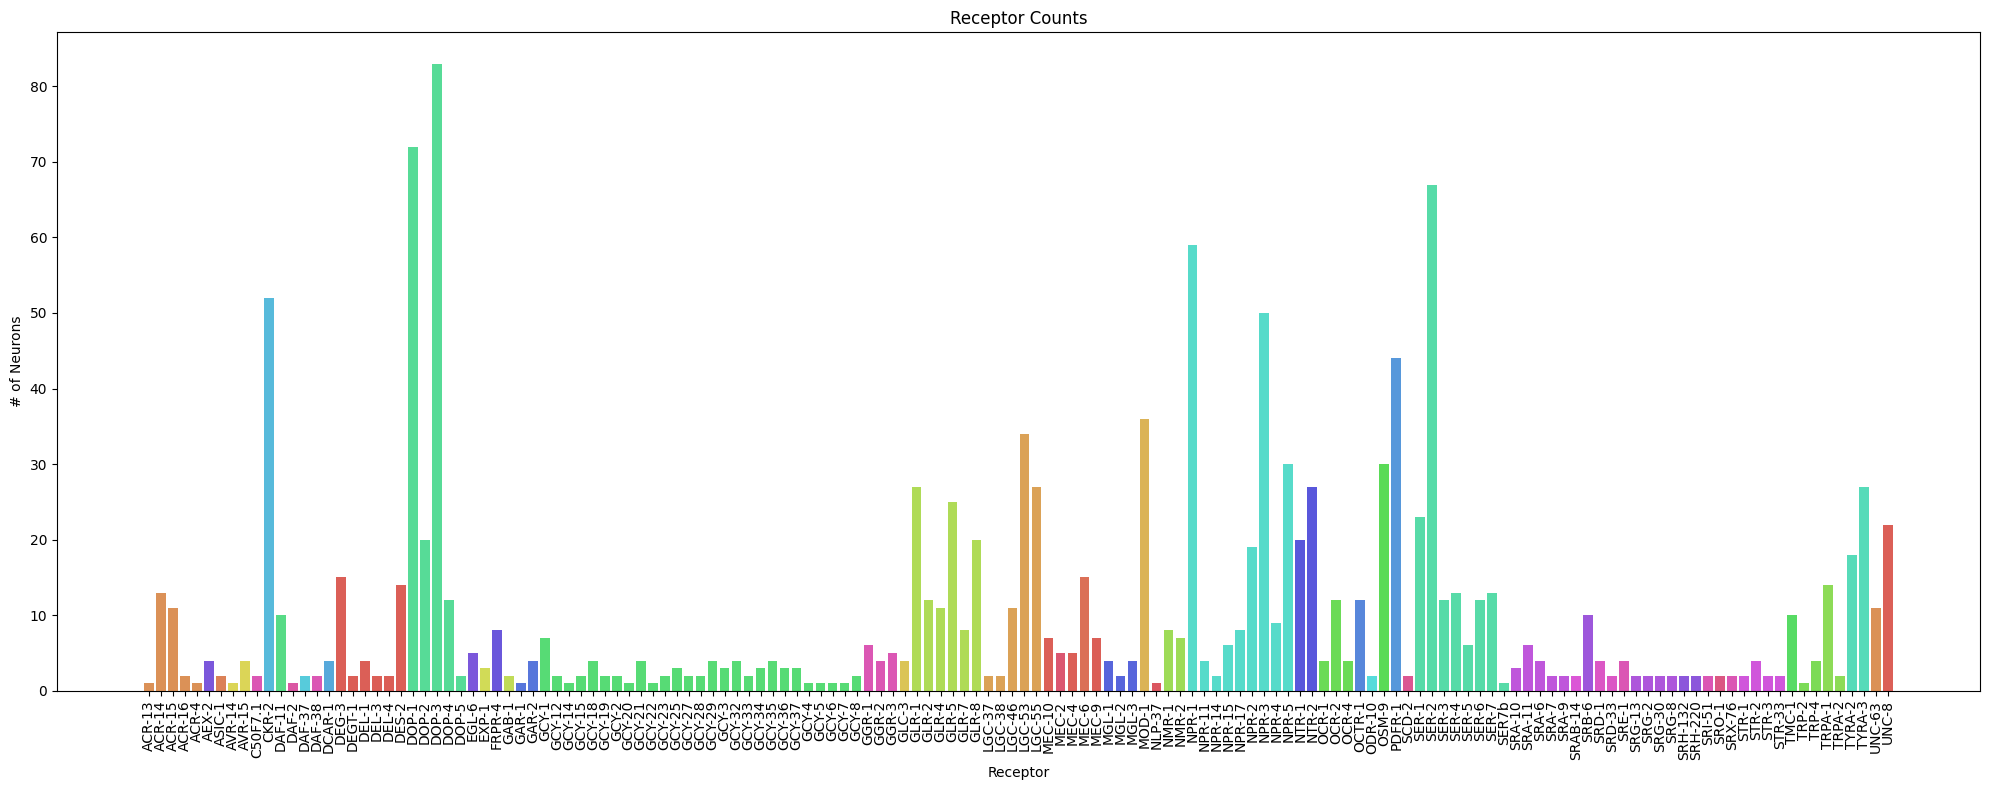

In [56]:
# Make a histogram of the counts of each receptor
# Make the x axis the receptor name and the y axis the count
# Make sure the plot is large enough to see the labels

# Apply the colors to the bars
bar_colors = [colors[receptor] for receptor in receptors.keys()]
plt.figure(figsize=(20, 8))
sorted_receptor_names = sorted(receptors.keys())
sorted_counts = [receptors[receptor] for receptor in sorted_receptor_names]
sorted_colors = [colors[receptor] for receptor in sorted_receptor_names]
plt.bar(sorted_receptor_names, sorted_counts, color=sorted_colors)
plt.xlabel('Receptor')
plt.ylabel('# of Neurons')
plt.title('Receptor Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [43]:
# Iterate over each neuron to retrieve its neurotransmitter(s)
neurotransmitters = dict()
for neuron in neurons:
    new_neurotransmitters = set(neuron.neurotransmitter())
    for neurotransmitter in new_neurotransmitters:
        if neurotransmitter not in neurotransmitters:
            neurotransmitters[neurotransmitter] = 1
        else:
            neurotransmitters[neurotransmitter] += 1

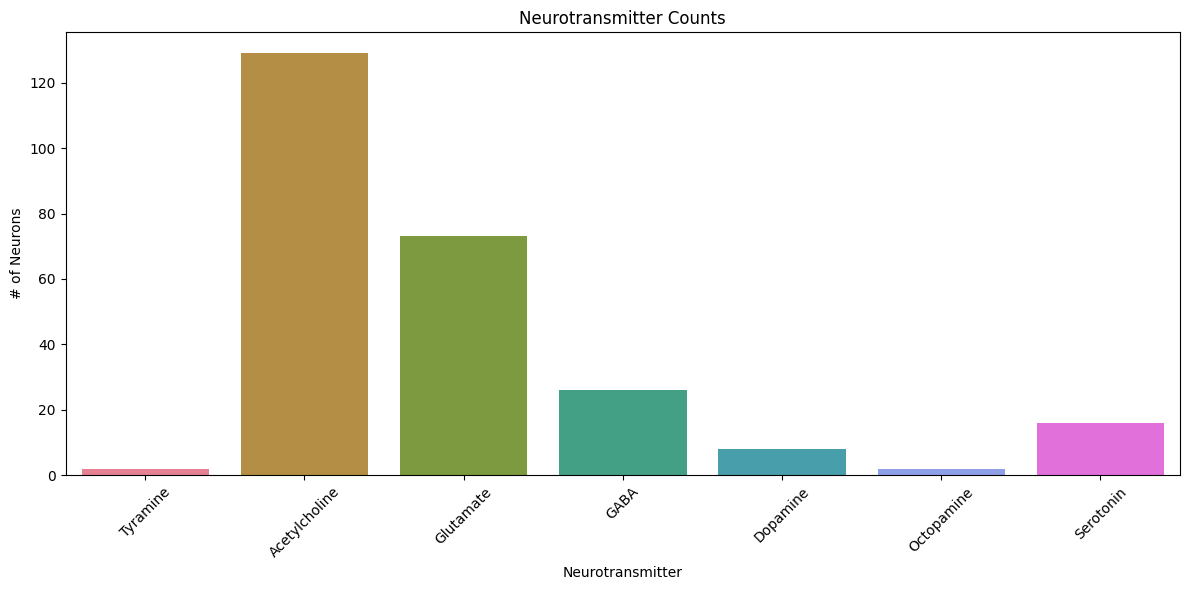

In [59]:
# Create a histogram of neurotransmitters
plt.figure(figsize=(12, 6))

# Extract neurotransmitter names and counts
neurotransmitter_names = list(neurotransmitters.keys())
neurotransmitter_counts = list(neurotransmitters.values())

# Use a seaborn color palette
palette = sns.color_palette("husl", len(neurotransmitter_names))

# Create the bar plot
sns.barplot(x=neurotransmitter_names, y=neurotransmitter_counts, hue=neurotransmitter_names, palette=palette, dodge=False, legend=False)

# Add labels and title
plt.xlabel('Neurotransmitter')
plt.ylabel('# of Neurons')
plt.title('Neurotransmitter Counts')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [50]:
# Iterate over each neuron to retrieve its neurotransmitter(s)
neuropeptides = dict()
for neuron in neurons:
    new_neuropeptides = set(neuron.neuropeptide())
    for neuropeptide in new_neuropeptides:
        if neuropeptide not in neuropeptides:
            neuropeptides[neuropeptide] = 1
        else:
            neuropeptides[neuropeptide] += 1

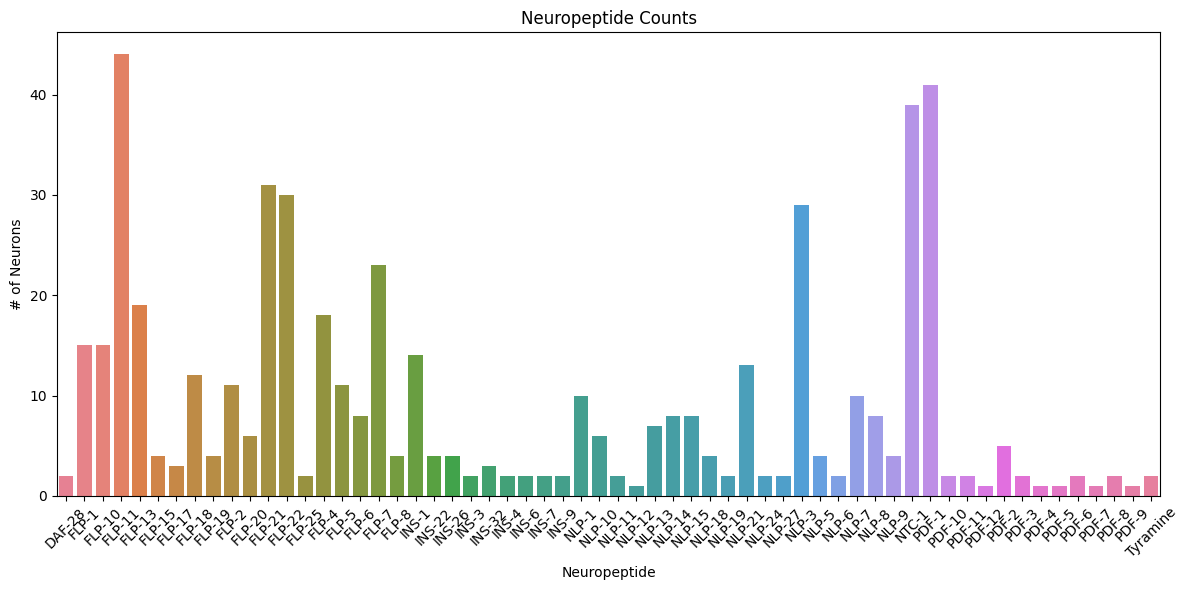

In [58]:
# Create a histogram of neurotransmitters
plt.figure(figsize=(12, 6))

# Extract neurotransmitter names and counts
neuropeptide_names = list(neuropeptides.keys())
neuropeptide_names.sort()
neuropeptide_counts = [neuropeptides[name] for name in neuropeptide_names]

# Use a seaborn color palette
palette = sns.color_palette("husl", len(neuropeptide_names))

# Create the bar plot
sns.barplot(x=neuropeptide_names, y=neuropeptide_counts, hue=neuropeptide_names, palette=palette, dodge=False, legend=False)

# Add labels and title
plt.xlabel('Neuropeptide')
plt.ylabel('# of Neurons')
plt.title('Neuropeptide Counts')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [74]:
# Iterate over each neuron to retrieve its neurotransmitter(s)
channels = dict()
for neuron in neurons:
    new_channels = set([channel.name() for channel in neuron.channel()])
    for channel in new_channels:
        if channel not in channels:
            channels[channel] = 1
        else:
            channels[channel] += 1

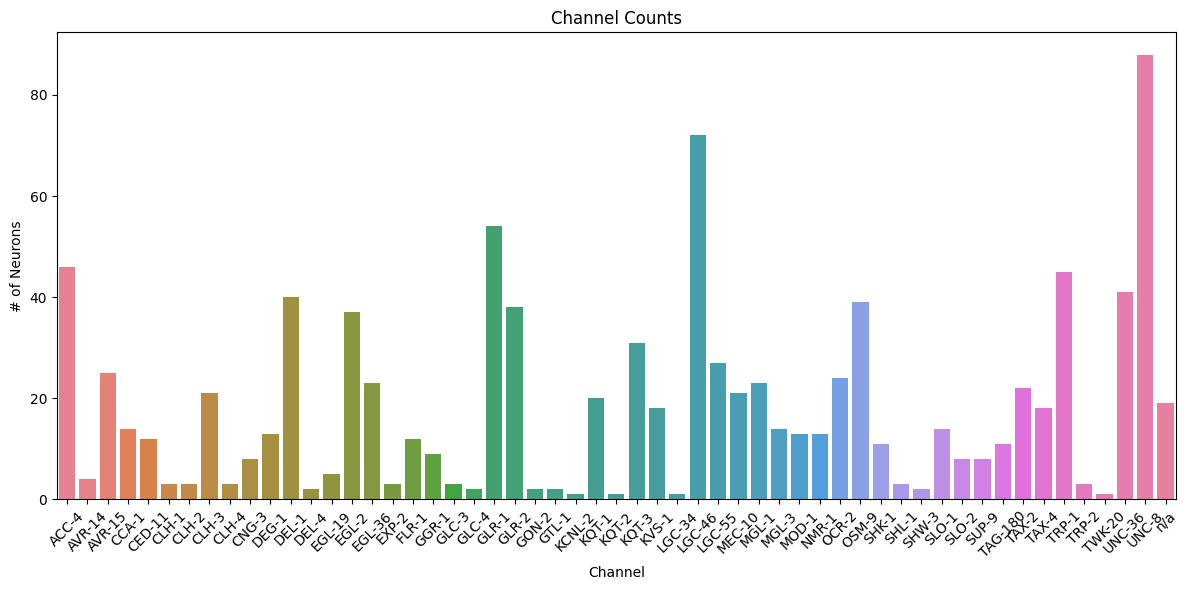

In [75]:
# Create a histogram of neurotransmitters
plt.figure(figsize=(12, 6))

# Extract neurotransmitter names and counts
channel_names = list(channels.keys())
channel_names.sort()
channel_counts = [channels[name] for name in channel_names]

# Use a seaborn color palette
palette = sns.color_palette("husl", len(channel_names))

# Create the bar plot
sns.barplot(x=channel_names, y=channel_counts, hue=channel_names, palette=palette, dodge=False, legend=False)

# Add labels and title
plt.xlabel('Channel')
plt.ylabel('# of Neurons')
plt.title('Channel Counts')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()